In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot

In [2]:
def getData(sentence):
    leftMembers = sentence['leftMembers']
    name = sentence['name']
    rightMembers = sentence['rightMembers']
    labels = {}
    edges = []
    for m in leftMembers:
        labels[m] = m
        edges.append((m, name[0]))
    for m in rightMembers:
        labels[m] = m
        edges.append((name[0], m))
    for m in name:
        labels[m] = m

    return ({'labels':  labels, 'edges': edges,
             'members': leftMembers + rightMembers, 'name': name})

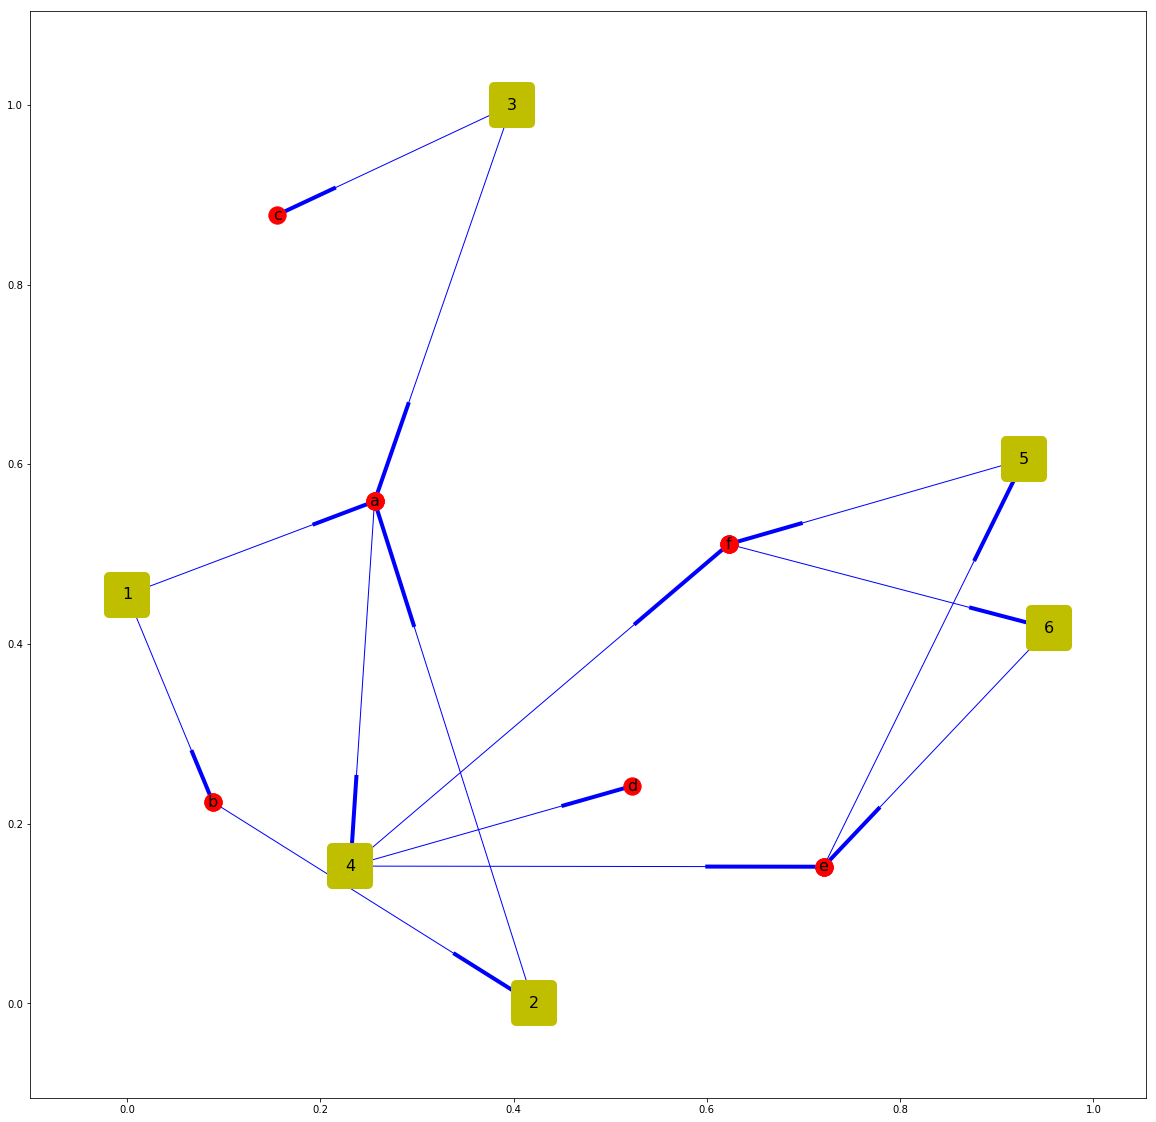

In [22]:
def drawGraph(data):
    width = 20
    height = 20
    plt.figure(figsize=(width, height))
    dx = nx.DiGraph()
    #dx.add_nodes_from((leftMembers + name + rightMembers))
    dx.add_edges_from(data['edges'])
    dx.subgraph(['e', 'f', 'd'])
    pos = nx.spring_layout(dx)

    nx.draw_networkx_labels(dx, pos, data['labels'], font_size=16)
    nx.draw_networkx_nodes(dx, pos, nodelist=data['members'], node_color='r')
    nx.draw_networkx_nodes(
        dx, pos, nodelist=data['name'], node_color='y', node_shape='s', node_size=1300, linewidths=10)
    nx.draw_networkx_edges(
        dx, pos, edgelist=data['edges'], edge_color='b', arrows=True)
    plt.show()
    return
drawGraph(data)

In [4]:
def mergeDict(dictA, dictB):
    for m in dictB.keys():
        if m not in dictA.keys():
            dictA[m] = dictB[m]
        dictA[m] = (dictA[m])
    return dictA

In [5]:
def mergeData(data1, data2):
    allData = {}
    for i in data1.keys():
        if type(data1[i]) == type({}):
            allData[i] = mergeDict(data1[i], data2[i])
        else:
            allData[i] = data1[i] + data2[i]
            allData[i] = (allData[i])
    return allData

In [6]:
def drawGraph2(data):
    graph = pydot.Dot(graph_type='graph')
    pyNodes = {}
    print(data)
    for n in data['members']:
        pyNodes[n] = pydot.Node(n, fillcolor='r')
    for n in data['name']:
        pyNodes[n] = pydot.Node(n, fillcolor="b", shape='box')
    for edge in data['edges']:
        graph.add_edge(pydot.Edge(edge[0], edge[1], label='a', color='r'))
    graph.write_png('ojj.png')

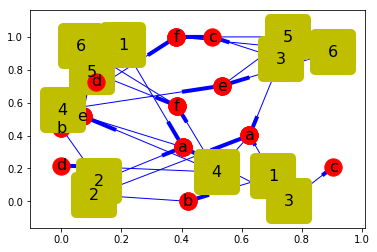

In [9]:
data = getData({'leftMembers': [], 'name': ('1'), 'rightMembers': ['a', 'b']})
data = mergeData(data, getData(
    {'leftMembers': ['b'], 'name': ('2'), 'rightMembers': ['a']}))
data = mergeData(data, getData(
    {'leftMembers': [], 'name': ('3'), 'rightMembers': ['a', 'c']}))
data = mergeData(data, getData(
    {'leftMembers': ['a'], 'name': ('4'), 'rightMembers': ['d', 'e', 'f']}))
data = mergeData(data, getData(
    {'leftMembers': ['e'], 'name': ('5'), 'rightMembers': ['f']}))
data = mergeData(data, getData(
    {'leftMembers': ['f'], 'name': ('6'), 'rightMembers': ['e']}))
drawGraph(data)
#drawGraph2(data)